## Project 2
## HealthCare
by Daryna Kondratiuk and Trang Vu

## Symptom clusters in cardiovascular disease

<a><img src='https://lh3.googleusercontent.com/G4ZTHX0F6lOEZgZ38fNVqVsVjk8uk-nqTpOajb-RzHSO_xj3zlf2_i7ILqak59nvXwwNW8ZlalWU-zNWw_Fx4VDlPo4L1MHa3zWRXFFkqhpmDVwIY_PHAI4faGVbOw4uPHvd8_sA=w2400' /></a>

<a id="contents"></a>
<div>
    <h1>
    Table of Contents
    </h1>
    <br>
    1. <a href='#intro'>Objective of the Proposed Research</a><br>
    2. <a href='#dataExp'>Data Exploration</a><br>
    3. <a href='#dataClean'>Data Cleaning</a><br>
    4. <a href='#adapt'>Adaption</a><br>
    5. <a href='#visual'>Descriptive Static Visualization</a><br>
    6. <a href='#explorecor'>Explore Correlations</a><br>
    7. <a href='#stepclust'>Step-by-step hierarchical clustering</a><br>
    8. <a href='#dendo'>Dendrogram</a><br>
    9. <a href='#Kmeans'>Step-by-step K-means</a><br>
   10. <a href='#sklearn.cluster'>sklearn.cluster</a><br>
   11. <a href='#knn'>kNN Function</a><br>
   12. <a href='#report'>Project Report</a><br>
   13. <a href='#origin'>Originality</a><br>
</div>

<a id="intro"></a>
<div>
    <h1>
        1. Objective of the Proposed Research 
    </h1> 
</div>

Our dataset consists of four databases: Cleverland, Hungary, Switzerland and Long Beach.In our morden life,heart disease cases increase significantly that triggers and threaten people around the world and many scientists has been working days by days to define solution and factors that could affect heart disease nowsadays. In this project, We would like to utilize this dataset to get a comprehensive overview of factors that could trigger or impact heart 
disease and gain some insight to provide and predict the solution based on the pattern and different aspects like excercise, depression, blood pressure, heart rates, vessels and so on. 

The goal is identify 2 groups of patients who had and who doesn't have heart disease by having similar symptoms.We will first explore the dataset to gain some brief information and statistic overview of the dataset, important 
attributes and information. We will also do some research in the background to have a proper knowdlege of the basic 
medical field regarding heart disease, blood pressure and some typical synonym involved in the dataset. Moving along
after finishing exploration, we will discuss and decide what elements we would like to keep for our further steps by 
utilize data cleaning. With data adaptation, we will create columns to keep track of the heart disease in each case by assigning string value for better retrieval and utilization of information in the future. We then will proceed to 
further analyzation and data clustering to gain persepctives and insights about the matter by focusing in some prospect factor like depression and excerise for causing heart disease. 

In our project, our stakeholder will be the American Heart Association since they are the nation's oldest and largest voluntary organization devoted to fighting heart disease and stroke. We would like to provide useful insight to help the American Heart Association find solution and educate people to prevent this 
kind of diease while making decision about what type of support they could provide to help people gain better 
health. 

<a href="#contents">Table of Contents</a>

<a id="dataExp"></a>
<div>
    <h1>
        2. Data Exploration 
    </h1> 
</div>

In [1]:
import numpy as np
import pandas as pd
from pandas import DataFrame
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


Print out the names of columns.

In [2]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

Let's see the age range that we have in our dataset.

In [3]:
df.age.unique()

array([52, 53, 70, 61, 62, 58, 55, 46, 54, 71, 43, 34, 51, 50, 60, 67, 45,
       63, 42, 44, 56, 57, 59, 64, 65, 41, 66, 38, 49, 48, 29, 37, 47, 68,
       76, 40, 39, 77, 69, 35, 74], dtype=int64)

In [4]:
# Statistic meanings of column age
df.age.describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

In [5]:
# Statistic information of column target
df.target.describe()

count    1025.000000
mean        0.513171
std         0.500070
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: target, dtype: float64

In [6]:
# Statistic information of column sex
df.sex.describe()

count    1025.000000
mean        0.695610
std         0.460373
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: sex, dtype: float64

In [7]:
# Dimension of the dataset
df.shape

(1025, 14)

Check the type of values in columns

In [8]:
#Let's get a brief overview of data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
age         1025 non-null int64
sex         1025 non-null int64
cp          1025 non-null int64
trestbps    1025 non-null int64
chol        1025 non-null int64
fbs         1025 non-null int64
restecg     1025 non-null int64
thalach     1025 non-null int64
exang       1025 non-null int64
oldpeak     1025 non-null float64
slope       1025 non-null int64
ca          1025 non-null int64
thal        1025 non-null int64
target      1025 non-null int64
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


Check if there are any NA in the dataframe.

In [9]:
# Using isnull() and any() function 
df.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [10]:
# Using isnull() and any() function 
# to check if any NA in the dataframe
df.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

<a id="dataClean"></a>
<div>
    <h1>
        3. Data Cleaning
    </h1> 
</div>

Since our data doesn't have any NA, we will focus on the choosing the columns which will be used for our analysis.

In [11]:
#print the names of the coulmns
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [12]:
#create a subset with the columns which will be used for clustering analysis
heart_data = df[['age','sex', 'trestbps', 'chol', 'fbs', 'thalach', 'oldpeak','target']]
heart_data.head()

,age,sex,trestbps,chol,fbs,thalach,oldpeak,target
0,52,1,125,212,0,168,1.0,0
1,53,1,140,203,1,155,3.1,0
2,70,1,145,174,0,125,2.6,0
3,61,1,148,203,0,161,0.0,0
4,62,0,138,294,1,106,1.9,0


So, to process clustering analysis, we will use next columns: Age, Sex, Blood pressure, Serum Cholestoral, Heart Rate, ST depression and Target.

<a href="#contents">Table of Contents</a>

<a id="adapt"></a>
<div>
    <h1>
       4. Adaptation
    </h1> 
</div>

We will rename our columns to make our dataframe more clear.

In [13]:
heart_data.columns = ['age', 'gender', 'bl_pres', 'cholest', 'blood_sug', 'heart_rate', 'depress', 'target']
heart_data.head()

,age,gender,bl_pres,cholest,blood_sug,heart_rate,depress,target
0,52,1,125,212,0,168,1.0,0
1,53,1,140,203,1,155,3.1,0
2,70,1,145,174,0,125,2.6,0
3,61,1,148,203,0,161,0.0,0
4,62,0,138,294,1,106,1.9,0


Since our dataset use a boolean values for sex and heart disease column, we will change 0 to male and 1 to female in column sex. For column heart disease will change 0 to "no disease" and 1 to "heart disease".

In [ ]:
# Create a new col heart_dis and using loc to assign the value 'no disease'
#to a new col if the value is 0
heart_data.loc[heart_data.target == 0, 'heart_dis'] = "no disease"

In [15]:
# Create a new col heart_dis and using loc to assign the value 'no disease'
#to a new col if the value is 1
heart_data.loc[heart_data.target == 1, 'heart_dis'] = "disease"

In [16]:
# Create a new col gend_type and using loc to assign the value 'male'
#to a new col if the value is 0
heart_data.loc[heart_data.gender == 0, 'gend_type'] = "male"

In [17]:
# Create a new col gend_type and using loc to assign the value 'female'
#to a new col if the value is 1
heart_data.loc[heart_data.gender == 1, 'gend_type'] = "female"

Create a new column and split the data into three different age groups.

In [18]:
heart_data.loc[(heart_data.age >= 29) & (heart_data.age <= 45) , 'age_group'] = "29-45"

In [19]:
heart_data.loc[(heart_data.age > 45) & (heart_data.age <= 60) , 'age_group'] = "46-60"

In [20]:
heart_data.loc[(heart_data.age > 60) , 'age_group'] = "over 60"

In [21]:
# Let's see what we have here
heart_data.head(5)

,age,gender,bl_pres,cholest,blood_sug,heart_rate,depress,target,heart_dis,gend_type,age_group
0,52,1,125,212,0,168,1.0,0,no disease,female,46-60
1,53,1,140,203,1,155,3.1,0,no disease,female,46-60
2,70,1,145,174,0,125,2.6,0,no disease,female,over 60
3,61,1,148,203,0,161,0.0,0,no disease,female,over 60
4,62,0,138,294,1,106,1.9,0,no disease,male,over 60


In this section, we decide to add three columns which are gend_type, heart_dis and age_group, which could help us to better retrive and analyze information in more sophisticated way. We utilize loc and logical condition statements to assign value in heart_dis and gend_type according to target and gender column respectively. In age_group column, we divide our data into three main groups based on the variety of ages that we have. So we have 29-45 years old group, 46-60 years old group and over 60 years old.


<a href="#contents">Table of Contents</a>

<a id="visual"></a>
<div>
    <h1>
        5. Descriptive Visualization
    </h1> 
</div>

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Pie Chart

In [24]:
# Utilize value_counts() function to count the frequency of the age group
heart_data["age_group"].value_counts()

46-60      540
over 60    272
29-45      213
Name: age_group, dtype: int64

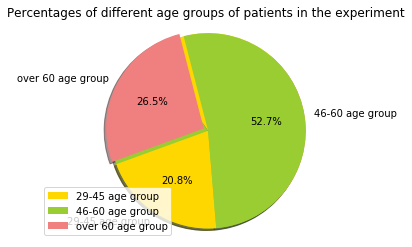

In [25]:
#calculate percentage of patients in each age group
group46to60 = 540/(540+272 + 213)
group29to45 = 213/(540+272 + 213)
groupover60 = 272/(540+272 + 213)
labels = '29-45 age group', '46-60 age group', 'over 60 age group'
sizes = [group29to45, group46to60 , groupover60]
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0, 0, 0.05)  # explode some slices 
patches, texts = plt.pie(sizes, colors=colors, shadow=True, startangle=50)
plt.legend(patches, labels, loc="best")

# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=200)

plt.axis('equal')
plt.title('Percentages of different age groups of patients in the experiment')
plt.show()

Pie chart shows us the percantage of patients who belongs to different age groups. So 52.7% of patients are in the age range 46-60, 26.5% are in the age of 60 or older and only 20.8 % of patients are in the age between 29-45 years old.

## 2. Categorical Scatter Plot

In [26]:
#create a subset for a scatter plot
vis_data1 = heart_data[['age_group', 'heart_rate']]
vis_data1.head()

,age_group,heart_rate
0,46-60,168
1,46-60,155
2,over 60,125
3,over 60,161
4,over 60,106


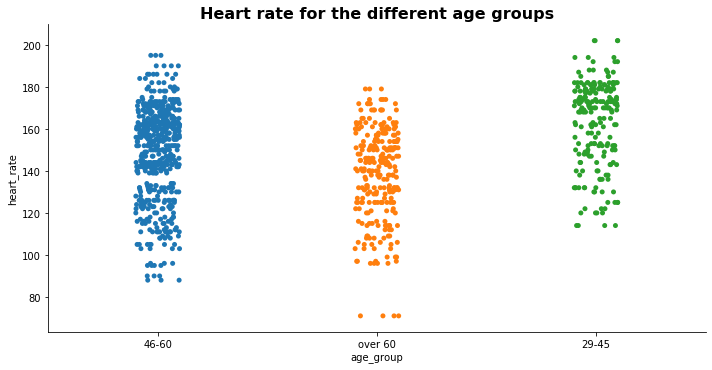

In [27]:
sns.catplot(x='age_group', y='heart_rate', data=vis_data1, aspect=2)
plt.title('Heart rate for the different age groups', weight='bold', fontsize=16)
plt.show()


In this categorical scatter plot that we just created, we visualize the differences in the heart rate for different age group. In accordance to the chart above, it is significant to notify that heart rate is witnessed to be really high with maximum over 200 in the 29-45 age group. Meanwhile, 45-60 has lower frequencies and level in heart rate with the most distribution of data being around 100 in heart rate. Over 60 age group has the lowest heart_rate with 180 being the maximum and below 80 as the minimum. 

## 3. Box Plot

In [28]:
#create a subset for a box plot
vis_data2=heart_data[['age_group','depress', "heart_dis"]]

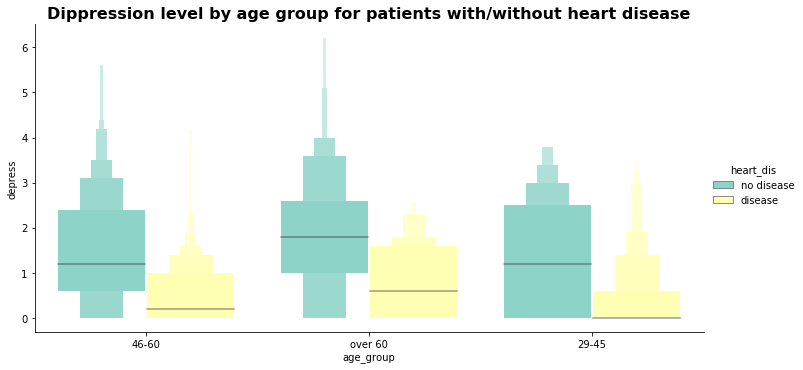

In [29]:
sns.catplot(x='age_group', y='depress', data=vis_data2, kind='boxen', hue='heart_dis', palette="Set3", saturation = 1, aspect=2)
plt.title('Dippression level by age group for patients with/without heart disease', weight='bold', fontsize=16)
plt.show()

The box plot shows us that people in the age group 29-45 with low depression level are more likely to have a heart disease. And actually it is common for aech age group. Otherwise, people with the middle depression level does not seem to have a heart disease.

## 4. Violin Chart

In [30]:
##create a subset for a violin chart
vis_data3 = heart_data[['heart_dis','bl_pres', "gend_type"]]

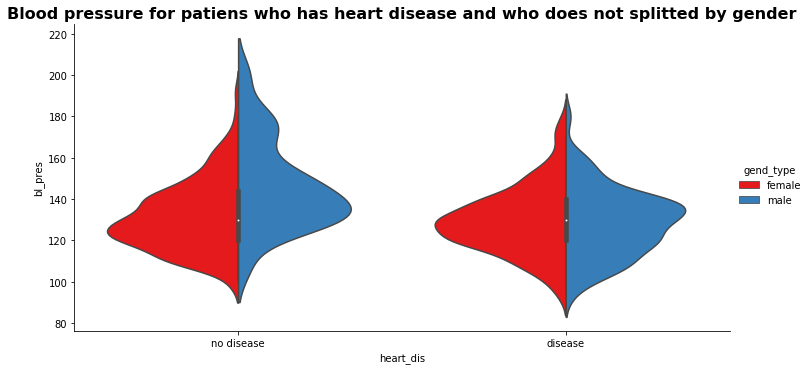

In [31]:
sns.catplot(x='heart_dis', y='bl_pres', data=vis_data3, kind='violin', hue='gend_type', palette="Set1", saturation = 2, split=True, aspect=2)
plt.title('Blood pressure for patiens who has heart disease and who does not splitted by gender', weight='bold', fontsize=16)
plt.show()

In this violin chart that we just created, it is noticable that female and male with heart disease tend to have the same level of blood pressure with the blood pressure being 190 as the maximum and the most frequencies of blood pressure amounds is 120. Meanwhile, female and male with no disease tend to have difference in the blood pressure level with the former being higher than the latter. 

<a href="#contents">Table of Contents</a>

<a id="explorecor"></a>
<div>
    <h1>
        6. Explore Correlations:
    </h1> 
</div>

In [32]:
# Loading neccessary library
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
from scipy.stats import norm 

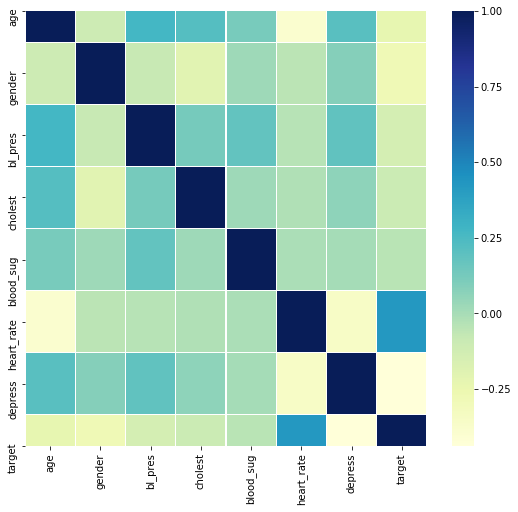

In [33]:
# Let's take a look and explore the correlations of the dataset
corrmat = heart_data.corr() 
  
f, ax = plt.subplots(figsize =(9, 8)) 
sns.heatmap(corrmat, ax = ax, cmap ="YlGnBu", linewidths = 0.1)

Due to the plot above we can see that such varables as blood pressure and age are correlated with a correlation level of 27%.  Also, heart rate and target has a high correlation level (39%), we can assume that depression level depends on age(21%) and blood pressure(35%).

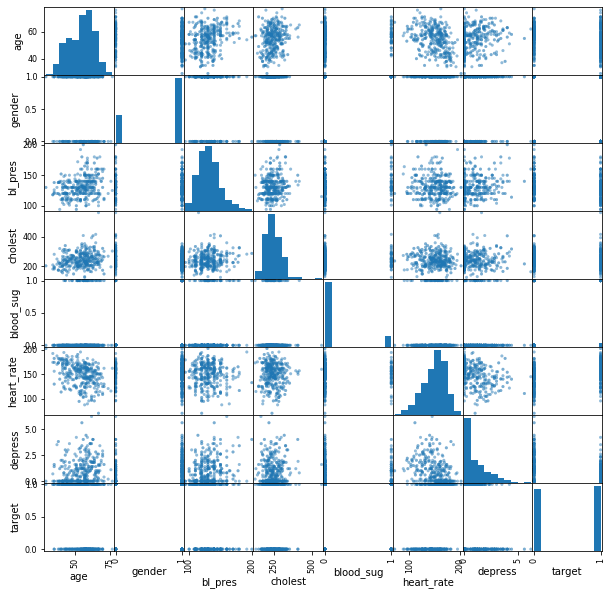

In [34]:
# Utilizing scatter matrix for exploring correlations.
from pandas.plotting import scatter_matrix
scatter_matrix(heart_data, alpha=0.2, figsize=(10, 10))
plt.show()

Text(0.5, 1, 'Correlation matrix')

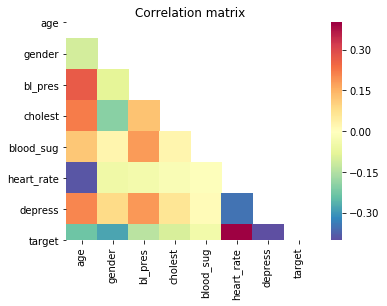

In [35]:
# Different ways to plot the correlations
corrs = heart_data.corr()
mask = np.zeros_like(corrs)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corrs, cmap='Spectral_r', mask=mask, square=True, vmin=-.4, vmax=.4)
plt.title('Correlation matrix')

In [36]:
# See the actual correlations coefficients value
heart_data.corr().round(2)

,age,gender,bl_pres,cholest,blood_sug,heart_rate,depress,target
age,1.00,-0.10,0.27,0.22,0.12,-0.39,0.21,-0.23
gender,-0.10,1.00,-0.08,-0.20,0.03,-0.05,0.08,-0.28
bl_pres,0.27,-0.08,1.00,0.13,0.18,-0.04,0.19,-0.14
cholest,0.22,-0.20,0.13,1.00,0.03,-0.02,0.06,-0.10
blood_sug,0.12,0.03,0.18,0.03,1.00,-0.01,0.01,-0.04
heart_rate,-0.39,-0.05,-0.04,-0.02,-0.01,1.00,-0.35,0.42
depress,0.21,0.08,0.19,0.06,0.01,-0.35,1.00,-0.44
target,-0.23,-0.28,-0.14,-0.10,-0.04,0.42,-0.44,1.00


As we could see from the correlation matrix, it is significant to notice that heart desease correlates strongly with heart tate (0.42) , following by depression, blood pressure and cholesteral being -0.44, -0. 28,-0.14 respectively. This demonstrate the fact that there are potential relationship among those variables affecting heart disease. We will dig deeper into analyzing these variables in the later section. 

<a href="#contents">Table of Contents</a>

<a id="stepclust"></a>
<div>
    <h1>
        7. Step-by-step hierarchical clustering
    </h1> 
</div>

In [37]:
#create a subset of our heart_data dataset by choosing specific columns
sub_data2 = heart_data[["age","gender","bl_pres", 'blood_sug', "cholest","heart_rate","depress"]]

In [38]:
sub_data2.head()

,age,gender,bl_pres,blood_sug,cholest,heart_rate,depress
0,52,1,125,0,212,168,1.0
1,53,1,140,1,203,155,3.1
2,70,1,145,0,174,125,2.6
3,61,1,148,0,203,161,0.0
4,62,0,138,1,294,106,1.9


For hierarchical clustering we will use agglomeration method, so each data point will be a seperate cluster at first step.
Then we will calculate the distance between each two clusters, take the two closest clusters and make them one cluster and so on, untill we will get one cluster.

In [39]:
#Make each data point a cluster and show 5 first points
clusters = sub_data2.values
clusters[5:]

array([[ 58. ,   0. , 100. , ..., 248. , 122. ,   1. ],
       [ 58. ,   1. , 114. , ..., 318. , 140. ,   4.4],
       [ 55. ,   1. , 160. , ..., 289. , 145. ,   0.8],
       ...,
       [ 47. ,   1. , 110. , ..., 275. , 118. ,   1. ],
       [ 50. ,   0. , 110. , ..., 254. , 159. ,   0. ],
       [ 54. ,   1. , 120. , ..., 188. , 113. ,   1.4]])

In [41]:
# calculate distance between each two points in dataset
distance = []
for i in range(len(sub_data2)):
    for j in range(len(sub_data2)):
        distance1 = [np.linalg.norm(sub_data2.values[i] - sub_data2.values[j])]
        distance.append(distance1)
distance

[[0.0],
 [21.941057403871856],
 [63.4],
 [27.2213151776324],
 [104.11440822479855],
 [63.82789358893179],
 [110.40181157933958],
 [87.70427583647219],
 [44.78883789517205],
 [90.54192399104406],
 [79.68287143420473],
 [133.42038824707413],
 [30.88834731739463],
 [98.73317578200349],
 [14.7648230602334],
 [30.88834731739463],
 [100.59448295011015],
 [80.02149711171367],
 [33.015299483724206],
 [16.522711641858304],
 [34.51086785347479],
 [37.208735533473856],
 [30.166206257996713],
 [42.883563284783136],
 [12.68857754044952],
 [99.95498987044118],
 [25.521755425518833],
 [108.92658077806354],
 [51.51854035199367],
 [137.3563249362766],
 [50.17210380281058],
 [33.015299483724206],
 [97.05689053333617],
 [89.09326573877512],
 [17.378147196982766],
 [38.33744905441675],
 [43.02510894814794],
 [62.41794613730894],
 [81.99780484866653],
 [25.4432702300628],
 [153.5839835399512],
 [50.85626805026102],
 [118.46096403457132],
 [44.78883789517205],
 [130.24223585304424],
 [24.939927826679853],
 

In [42]:
#sort distance values and show last 5 values
distance.sort()
distance[-5:]

[[439.70667495502045],
 [439.70667495502045],
 [439.70667495502045],
 [439.70667495502045],
 [439.70667495502045]]

In [43]:
#take the two closest cluster and make them one cluster, do that for each two clusters
cluster1 = [distance[0],distance[1]]
cluster1

[[0.0], [0.0]]

In [44]:
#Repeat previous step for each two clusters until there is only one cluster
final_cluster = []
final_cluster.append(np.argmin(distance))
final_cluster

[0]

Run the hierarchical clustering by using scipy.cluster.hierarchy library.

In [45]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [46]:
from sklearn.metrics.pairwise import euclidean_distances
sub_data2_distance = DataFrame(euclidean_distances(sub_data2))
sub_data2_distance.astype(int).head(5)

,0,1,2,3,4,5,6,7,8,9,...,1015,1016,1017,1018,1019,1020,1021,1022,1023,1024
0,0,21,63,27,104,63,110,87,44,90,...,37,72,101,45,29,19,53,81,45,60
1,21,0,45,13,103,68,118,88,51,93,...,30,82,100,44,31,21,59,86,59,48
2,63,45,0,47,121,87,148,118,84,115,...,47,118,115,56,53,62,88,109,95,34
3,27,13,47,0,106,76,121,88,58,98,...,38,80,106,53,42,20,62,93,64,57
4,104,103,121,106,0,61,48,45,63,22,...,82,69,23,137,101,93,51,38,73,108


In [47]:
import matplotlib.pyplot as plt
%matplotlib inline

In [48]:
Z = linkage(sub_data2_distance, 'average')
Z

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


array([[0.00000000e+00, 6.34000000e+02, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 6.92000000e+02, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 8.40000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [2.04300000e+03, 2.04500000e+03, 1.63640817e+03, 1.00900000e+03],
       [2.02000000e+03, 2.04600000e+03, 3.62933252e+03, 1.02200000e+03],
       [1.27400000e+03, 2.04700000e+03, 8.23776269e+03, 1.02500000e+03]])

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [45.0, 45.0, 55.0, 55.0],
  [35.0, 35.0, 50.0, 50.0],
  [75.0, 75.0, 85.0, 85.0],
  [65.0, 65.0, 80.0, 80.0],
  [105.0, 105.0, 115.0, 115.0],
  [95.0, 95.0, 110.0, 110.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [125.0, 125.0, 142.5, 142.5],
  [102.5, 102.5, 133.75, 133.75],
  [72.5, 72.5, 118.125, 118.125],
  [42.5, 42.5, 95.3125, 95.3125],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [172.5, 172.5, 202.5, 202.5],
  [235.0, 235.0, 245.0, 245.0],
  [225.0, 225.0, 240.0, 240.0],
  [275.0, 275.0, 285.0, 285.0],
  [265.0, 265.0, 280.0, 280.0],
  [255.0, 255.0, 272.5, 272.5],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [365.0, 365.0, 375.0, 375.0],
  [355.0, 355.0, 370.0, 370.0],
  [332.5, 332.5, 362.5, 362.5],
  [302.5, 302.5, 347

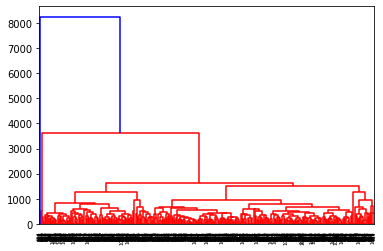

In [49]:
dendrogram(Z)

<a href="#contents">Table of Contents</a>

<a id="dendo"></a>
<div>
    <h1>
        8. Dendogram
    </h1> 
</div>

In [ ]:
# change the range of the data with function MinMaxScaler and assign that to new subset "sub_data1"
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sub_data1 = scaler.fit_transform(sub_data2)
sub_data1

In [ ]:
#plot the dendogram to choose the k number
from scipy.cluster.hierarchy import dendrogram, linkage
# Let's create dendogram to define k number of the clusters
Z = linkage(sub_data1, 'average')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
dendrogram(Z, leaf_font_size =3.)
plt.show()

After inspecting the dendrogram that was produced above by using hierarchical clustering we can suggest to use 4 different clusters for our dataset.

<a href="#contents">Table of Contents</a>

<a id="Kmeans"></a>
<div>
    <h1>
        9. Step-by-step K-means
    </h1> 
</div> 

For each point:
 - We need to find a distance from the point to centroid
 - Find the shortest distance to centroid from each point 
 - Assign to those point the number of cluster respectively

In [ ]:
#randomly define 4 centroids 
import random
centroid_points = [(random.uniform(0.0, 1.0),random.uniform(0.0, 1.0),random.uniform(0.0, 1.0),
                   random.uniform(0.0, 1.0),random.uniform(0.0, 1.0),random.uniform(0.0, 1.0),
                   random.uniform(0.0, 1.0)) for i in range(4)]
centroid_points

In [ ]:
def kmean(sub_data1, k): # create a function which will calculate kmean
    centroids = centroid_points
    centroids_old = [] # create an empty variable to save there old values of centroids
    
    while(centroids_old != centroids):
        centroids_old = centroids
        clusters = []

        for i in range(len(sub_data1)):
            #calculate distance from each data point to each centroid
            distances = [np.linalg.norm(sub_data1[i] - centroid) for centroid in centroids] 
            #assign min distance between our data points and centrois to cluster
            clusters.append(np.argmin(distances))
        
        for j in range(k):
            centroids.append(np.mean(clusters[clusters==j]))
            
        return clusters

Our function kmean returns the list which define to which cluster each data point belongs to.

In [ ]:
#print the the first 5 values
kmean(sub_data1, 2)[:5]

So first data point belongs to cluster 2, second data point to cluster 3 and so on.

<a href="#contents">Table of Contents</a>

  <a id="sklearn.cluster"></a>
<div>
    <h1>
        10. sklearn.cluster
    </h1> 
</div>

In this section, we will run again unsupervised k-means clustering analysis, but this time by using the sklearn.cluster library.

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm

In [ ]:
#using build in function K means cluster
model = KMeans(n_clusters = 4)
model.fit(sub_data1)

In [ ]:
#print out a cluster number for each data point
model.labels_

Let's create a new subset which will include only 2 columns of our data to visualize the clusters for data on the scaterplot.

In [ ]:
plot_data = heart_data[["heart_rate", "bl_pres"]]
plot_data.head()

In [ ]:
model2 = KMeans(n_clusters = 4)
model2.fit(plot_data)

In [ ]:
model2.labels_

In [ ]:
# View the results
# Set the size of the plot
fig = plt.figure(figsize=(5, 5))
 
# Create a colormap
colormap = np.array(['yellow', 'red', 'blue', 'grey', 'black'])
 
plt.scatter(plot_data.heart_rate, plot_data.bl_pres, c=colormap[model2.labels_], s = 80)
plt.title('K Mean Classification')
ax = fig.add_subplot(111)
ax.set_xlabel('Heart Rate')
ax.set_ylabel('Blood Pressure')


Scatter plot above visually demostrate how our data divided by 4 clusters (each cluster is a different color).

In [ ]:
# Create scatterplot to present the random cendroids in the plot with red marker being random cendroids
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
subdata = heart_data[['bl_pres','heart_rate','cholest']]
kmeans = KMeans(n_clusters=3).fit(subdata)
centroids = kmeans.cluster_centers_
print(centroids)
fig = plt.figure()
fig = plt.figure(figsize=(10, 10))
plt.title('3D K Mean Classification')
ax = fig.add_subplot(111, projection = '3d')
ax = Axes3D(fig)
ax.scatter(subdata['bl_pres'], subdata['heart_rate'],subdata['cholest'], c= kmeans.labels_.astype(float), s=40, alpha=1)
ax.scatter(centroids[:, 0], centroids[:, 2],centroids[:, 1], marker="x", c='red', s=80)
ax.set_xlabel('Blood pressure')
ax.set_ylabel('Heart Rate')
ax.set_zlabel('Cholesterol')
#ax.title('K Mean Classification')

## 2D prediction mesh 

In [ ]:
def plotMesh():
    h = 0.1
    # Create color maps
    cmap_light = ListedColormap(['#ffffcc', '#ff8080','#ccd9ff','#f5ccff'])
    colormap = np.array(['yellow', 'red', 'blue', 'grey'])

    x_min, x_max = plot_data.heart_rate.min() - 1, plot_data.heart_rate.max() + 1
    y_min, y_max = plot_data.bl_pres.min() - 1, plot_data.bl_pres.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    Z = model2.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap = cmap_light)

    # Plot also the training points
    plt.scatter(plot_data.heart_rate, plot_data.bl_pres, c = colormap[model2.labels_], s = 120)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title('Prediction mesh for patients health conditions')
    ax = fig.add_subplot(111)
    ax.set_xlabel('Heart Rate')
    ax.set_ylabel('Blood Pressure')
plotMesh()


In [ ]:
colormap = np.array(['yellow', 'red', 'blue','grey'])

heart_rate = int(input('Heart rate: '))
depress = int(input('Blood pressure: '))
data_class = model2.predict(np.array([heart_rate, depress]).reshape(1, -1))[0]
colormap[data_class]

In the latter section of predicttion, we utilize Kmeans function to create mesh that visualize our cluster of data into different colorset and division. We grouped our dataset for 4 clusters by heart_rate and Blood pressure. Our plotMesh visually demonstrate how patiens divided into different groups by similar health conditions. People are high heart rate and high blood pressure tend to lean more into high risk of heart diase. In accordance to our mesh prediction, people are under blue category has high blood pressure and high heart rate,which is risky and cause high potential of heart disease. Meanwhile, patients fall under red section of the mesh  have low heart rate and medium blood pressure. The violet and yellow color identify people being medium and high in heart rate and low in blood pressure respectively. So, patients who belongs to red cluster has a low blood pressure and low heart rate.

<a href="#contents">Table of Contents</a>

<a id="knn"></a>
<div>
    <h1>
        11. kNN Function
    </h1> 
</div> 

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.cluster import KMeans
import sklearn.metrics as sm


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 4, 
                           p = 2)# p=2 for euclidean distance
knn.fit(heart_data[["bl_pres", "heart_rate"]], 
        heart_data.target)

In [ ]:
#create features and target variables
#in our case target is YES/NO heart disease
features = heart_data[['bl_pres', 'heart_rate']].values
target = heart_data['target'].values

In [ ]:
# split the features and target data into train (70%) and test data(30%)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

#Run the kNN classifier with 4 neighbors 
knn_classifier = KNeighborsClassifier(n_neighbors=4)

#Apply the classifier to the training data 
knn_classifier.fit(X_train, y_train)

#Get the accuracy score from the test datasets
knn_classifier.score(X_test, y_test)

An accuracy score is 0.76. It's relatively high score and that means that the number of neighbors is optimal value.

To find the optimal number of neighbors we use the GridSearchCV algorithm. 

In [ ]:
import numpy as np
from sklearn.model_selection import GridSearchCV

#Create a grid with possible number of neighbors from 1 to 50
grid = {'n_neighbors' : np.arange(1, 50)}

#Run a k-NN classifier 
knn_classifier = KNeighborsClassifier()

#Using cross validation to find optimal number of neighbors 
knn = GridSearchCV(knn_classifier, grid, cv = 10)

knn.fit(X_train, y_train)

#Extracting the optimal number of neighbors 
knn.best_params_

#Extracting the accuracy score for optimal number of neighbors
knn.best_score_

In [ ]:
knn.best_params_

So, our accuracy score is higher if we use 1 neighbor for clustering algorithm.

We also trying to increase the accuracy score by scaling data.

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

#Setting up the scaling pipeline 

pipeline_order = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors = 1))]

pipeline = Pipeline(pipeline_order)

#Fitting the classfier to the scaled dataset 

knn_classifier_scaled = pipeline.fit(X_train, y_train)

#Extracting the score 

knn_classifier_scaled.score(X_test, y_test)

The accuracy rate for both models is almost the same, so we caanot say that scaling the data for our dataset results in improved performance.

In [ ]:
# make prediction for such parameters as Blood Pressure and Heart Rate
def prediction():
    bl_pres = int(input('Blood Pressure: '))
    heart_rate = int(input('Heart rate : '))
    data_class = knn.predict(np.array([bl_pres, heart_rate]).reshape(1, -1))[0]
    class_name = ["No Heart Disease", "Heart Disease"]
    print('Prediction: Patient X has', data_class, class_name[data_class])
    return prediction

In [ ]:
prediction()

In [ ]:
# make prediction for such parameters as Blood Pressure and Cholesterol
def prediction2():
    bl_pres = int(input('Blood Pressure: '))
    heart_rate = int(input('Cholesterol : '))
    data_class = knn.predict(np.array([bl_pres, heart_rate]).reshape(1, -1))[0]
    class_name = ["No Heart Disease", "Heart Disease"]
    print('Prediction: Patient X has', data_class, class_name[data_class])
    return prediction

In [ ]:
prediction2()

In [ ]:
# make prediction for such parameters as Depression Rate and Heart Rate
def prediction3():
    bl_pres = int(input('Depression: '))
    heart_rate = int(input('Heart rate : '))
    data_class = knn.predict(np.array([bl_pres, heart_rate]).reshape(1, -1))[0]
    class_name = ["No Heart Disease", "Heart Disease"]
    print('Prediction: Patient X has', data_class, class_name[data_class])
    return prediction

In [ ]:
prediction3()

In [ ]:
# make prediction for such parameters as Age and Blood Pressure
def prediction4():
    bl_pres = int(input('Age: '))
    heart_rate = int(input('Blood pressure : '))
    data_class = knn.predict(np.array([bl_pres, heart_rate]).reshape(1, -1))[0]
    class_name = ["No Heart Disease", "Heart Disease"]
    print('Prediction: Patient X has', data_class, class_name[data_class])
    return prediction

In [ ]:
prediction4()

In [ ]:
# make prediction for such parameters as Depression Rate and Cholesterol
def prediction5():
    bl_pres = int(input('Depression: '))
    heart_rate = int(input('Cholesterol : '))
    data_class = knn.predict(np.array([bl_pres, heart_rate]).reshape(1, -1))[0]
    class_name = ["No Heart Disease", "Heart Disease"]
    print('Prediction: Patient X has', data_class, class_name[data_class])
    return prediction

In [ ]:
prediction5()

<a href="#contents">Table of Contents</a>

<a id="report"></a>
<div>
    <h1>
        12. Project Report
    </h1> 
</div> 

## Symptom clusters in cardiovascular disease

*by Daryna Kondratiuk and Trang Vu*

*25th October,2019*

*In our morden life,heart disease cases increase significantly that triggers and threaten people around the world and many scientists has been working days by days to define solution and factors that could affect heart disease nowsadays. Approximately half of million people in the United States are killed by heart disease each year. Our goal is to conduct deep analysis and data clustering in order to visualize and group useful information of data. We are hope to contributing to yours organization helpful resources and foundation of information in educating people of what potential factors and outcomes are departed from heart disease and what they can or can not do to protect their heart, and why heart diease should be prioritized and concentrated in different aspects in order for people's health goals. It is essential to keep health risks in perspective and the important to boost the public awareness about the risk of the matter. In this project, We had utilized this dataset to get a comprehensive overview of factors that could trigger or impact heart disease and gain some insight to provide and predict the solution based on the pattern and different aspects like excercise, depression, blood pressure, heart rates, vessels and so on. e would like to provide useful insight to help the American Heart Association find solution and educate people to prevent this kind of diease while making decision about what type of support they could provide to help people gain better health.* 

*When it comes to our parts of our data exploration, we learn to get to know the data gradually by exploring different aspects such as columns's name, unique value in one particular column like age since we want to see the variety of age groups of patients in the experiment. Furthermore, we aso learn other aspects of data through exploration like shape information, statistic description through describe function of python. We have learnt that patients at the age of 77 and the gender being male has the highest frequency in the dataset in compare to other values in the same column. Heart disease diagnosis are witnessed to be more than no heart disease diagnosis with more than 75% (768 patiens) being targeted with heart disease. Going further, we decide to add three columns which are gend_type, heart_dis and age_group, which could help us to better retrive and analyze information in more sophisticated way. We utilize loc and logical condition statements to assign value in heart_dis and gend_type according to target and gender column respectively. In age_group column, we divide our data into three main groups based on the variety of ages that we have. So we have 29-45 years old group, 46-60 years old group and over 60 years old. By this approach, it will be more efficient for us to retrieve information and categorical visualization and clustering effectively.*

*Data visualization helps us significantly to initially visualize the data and gain the comprehensive overview  of the pattern and special information regarding the highlighted and factors that trigger or affects heart disease. Thanks to the various and dynamic library of python, we could conduct and create lively and details plot and seaborn types that dynamically describe the data in very colorful and abstract viewpoints. Pie chart shows us the percantage of patients who belongs to different age groups. With 52.7% of patients are in the age range 46-60, 26.5% are in the age of 60 or older and only 20.8 % of patients are in the age between 29-45 years old.We also created categorical scatter plot; we visualize the differences in the heart rate for different age group.*

*In accordance to our visualization, it is significant to notify that heart rate is witnessed to be really high with maximum over 200 in the 29-45 age group. Meanwhile, 45-60 has lower frequencies and level in heart rate   with the most distribution of data being around 100 in heart rate. Over 60 age group has the lowest heart_rate with 180 being the maximum and below 80 as the minimum. The box plot help us demonstrate the fact that people in the age group 29-45 with low depression level are more likely to have a heart disease. And actually it is common for aech age group. Otherwise, people with the middle depression level does not seem to have a heart disease.In accordance to our violin chart that shown below, it is noticable that female and male with heart disease tend to have the same level of blood pressure with the blood pressure being 190 as the maximum and the most frequencies of blood pressure amounds is 120. Meanwhile, female and male with no disease tend to have difference in the blood pressure level with the former being higher than the latter. In overall, visualization part is where we could find a comprehensive overview and also direction of where we should go to dig deeper into data analyzation and clustering. It is a intial cluster that groups the data while being controlled by different aspects. We could see that age group,depression and blood pressure seem to play important parts into the different of heart disease diagnosis which happens more in the middle age group of 46 to 60 and older age groupd of being over 60. We could tell that depression level and the characteristic of the age group pay significant impact into the growth of heart diease. That could be derived from the stressful of works and hustle and modern life style which cause isolation and depression being high for the older age group. Young people are in the age range of 29 to 45 are supprisingly low with heart disease cases but still realy high in term of depression.*

<img src='https://lh3.googleusercontent.com/qXwah6gvxZwFIv_j2N_roeEs-mnSYYUcCvkfoq5i999ZqsXtpaKNDumopXAGEjvT3WGrTwjUgwnnQCQUHRNKzKPJUkzki_qVu3SScfdab43DmTq2e67htTYHO93ep654EQL-a6SlQQ=w2400' /></a>

<img src='https://lh3.googleusercontent.com/2hDI1KiUw-OtcDnxEmTCloF0xBX2wkp8NEMkJVRJohV5tJwxghQwuJNhHzv65KOOhiEwxscqsFyn9e6yY8Nygij6eQG2W54Nvv3WSYvIalnAYYojF3DZXoCKn38aHcpRmRRD0vLX1Q=w2400' /></a>

*As far as the correlation exploration practice is conducted, it is essential to perform this approach to visualize the 
correlation and relationship of each attribute in the dataset using pairwise and heatmap features to classify different
level of correlation.As we could see from the correlation matrix, it is significant to notice that heart desease correlates strongly with heart tate (0.42) , following by depression, blood pressure and cholesteral being -0.44, -0. 28,-0.14 respectively. This demonstrate the fact that there are potential relationship among those variables affecting heart disease. This give us useful information and direction to specialize in particular varibales and subet of the dataset without analyzing everything without having specific target to deep learning. Supprisingly gender and age play a lower role in term of impacting the difference in target (heart disease).*

<a><img src='https://lh3.googleusercontent.com/VFtc7zQ_jGV2gZ2-oboil0kC8cUcrMjTtI_khZTqJL4albTzI5hSbxg1YPzmfPYDDuT6zoJZBfyUf_ff7AYGzjYoFvkngryqNRY9B8Un0oyBjNPwWv0_apIVMmPfSeJ8VDRsjcg5=w2400' /></a>

*For hierarchical clustering we use agglomeration method, so each data point will be a seperate cluster at first step. Then we calculate the distance between each two clusters, take the two closest clusters and make them one cluster and so on, untill we get one cluster.
A dendogram is defined as a diagram that illustrates the hierarchical relationship between. Dendogram help us to work 
the best way to allocate objects to clusters. This dendogram shows the distance or dissimilarity between each clusters of age,blood pressure, cholesterol and heart rate . We first assign every single data point a cluster itself.  We could see the different levels of the clusters here. In accordance to our dendogram, 
it is noticable that the big difference between different group of clusters themselves and there are about two main 
cluters by the end, each one combines two different group of clusters. We could also see in different group of clusters,there are more similarities between each small groups in compare to simplicifolios.*


<a><img src='https://lh3.googleusercontent.com/n4bCDU3f63Xczh4jnq4N9Xu62Ey8w-7cfofuGqRljF9qV-RlC_Zn44S3_9nkT0PITXua-0_uTJXJFWiLlr5h4CKlUqZUKws63TbWtnq60MlMNjIkAcNtREaTe5ppRm4mcGHz9Es7=w2400' /></a>

*kMeans function classify a given dataset through a certain number of clusters, in our case the number of clusters k = 4. We randomly defined the centroids. The  next  step is to take each point, find the distance to each centroid and assign the closest data points to centroid to the corresponding cluster. When no point  is  pending, we need to re-calculate k new centroids as calculating the mean of all points in the cluster and assign whis value to centroid value. After we have these k new centroids, a new binding has to be done  between  the same data set points  and  the nearest new center. A loop has been generated. As a result of  this loop we  may  notice that the k centers change their location step by step until no more changes  are done. Our function kmean returns the list which define to which cluster each data point belongs to. We visualized our clusters in 3D scatter plot, it demonstrates that we have 4 different clusters created by such sympthoms as Blood pressure, Heart rate and Cholesterol.*

<a><img src='https://lh3.googleusercontent.com/isdPTnPP1HgOg4xrcG5KAxBcfTb_FU4dhweX6qqOEYqgAWYKvrwUgiT1GsUsYnR65qQERq0a0U481S4EQLGWQRwkTbfVPiuqwM4qAK1IQQYcUh4RLuA8t5_ZGs539KmDaYMNPLOayA=w2400' /></a>

*In the latter section of predicttion, we utilize Kmeans function to create mesh that visualize our cluster of data into different colorset and division. We grouped our dataset for 4 clusters by heart_rate and Blood pressure. Our plotMesh visually demonstrate how patiens divided into different groups by similar health conditions. People are high heart rate and high blood pressure tend to lean more into high risk of heart diase. In accordance to our mesh prediction, people are under blue category has high blood pressure and high heart rate,which is risky and cause high potential of heart disease. Meanwhile, patients fall under red section of the mesh  have low heart rate and medium blood pressure. The violet and yellow color identify people being medium and high in heart rate and low in blood pressure respectively. So, patients who belongs to red cluster has a low blood pressure and low heart rate.*

<a><img src='https://lh3.googleusercontent.com/Pv8ShKr8GRCBKD7bE1DGejXfbj_VuxS9ziqe3pEjN1lP1PJgzMmT6HPNfECzE9Dtw9WP0FH4y97FeeAyjUcJY4V9af4E3cnDWHlqoZSmObNVe7rw5JA_Ffb2txTpe9_fHn46eIeO=w2400' /></a>

Going further by the end of our progress, we utilize non-parametric method and supervised learning algorithm used for classification named Knn. In this progress, we go step by step to create features and target variables which are yes/no heart disease. We then split the features and target data into train being 70% and test data being 30%. Sklearn neighbors library is then imported for us to run the Knn classifier with 4 neighbors, which help us to proceed to the next step of applying the classifier to the training data and get the accuracy score from the datasets. As a result, the accuracy score that we get is 0.76 which is relatively high score and that means that the number of neighbors is optimal value. We then utilize GridSearchCV algorithm to find the optimal number of neighbors and find out that our accuracy score is higher if we use 1 neighbor for clustering algorithm. (97%) We also try to increase the accuracy score by scaling the data. The accuracy rate for both models is almost the same, so we caanot say that scaling the data for our dataset results in improved performance. At the end of the progress, we create the Knn function that could make prediction for different type of variables which are blood pressure and heart rate for the first function; blood pressure and cholesterol for the second function; depression rate and heart rate for the third function; age and blood pressure for the fourth function and depression rate and cholesterol for the last function. In all of these functions, we utilize knn.predict that we work on the intial steps to detect and classify whether the information of requested parameters inputted will be classified as heart disease or no heart disease. It work successfully and we are able to detect and classify different health condition to help patients detect if they have high potential of heart disease or not base on their depression level, blood pressure, age, heart rate and cholesterol. 

<a href="#contents">Table of Contents</a>

<a id="origin"></a>
<div>
    <h1>
        13. Originality
    </h1> 
</div> 

No other similar published works for linear regression found with same dataset

<a href="#contents">Table of Contents</a>